In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
#read in preprocessed_df.csv
df = pd.read_csv('csv_flight/preprocessed_df.csv')
#move target variable(DepDelay) to the end
df = df[[c for c in df if c not in ['DepDelay']] + ['DepDelay']]
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportSeqID,...,is_holiday_week,MinSince,DepartureDensity,ArrivalDensity,TotalDensity,Visibility,WindSpeed,SevereWeather,BadWeather,DepDelay
0,2014,1,1,1,3,2014-01-01,OO,N724SK,4974,1039705,...,1,360,6.0,4.0,10.0,10.0,5.0,0,0,-3.0
1,2014,1,1,1,3,2014-01-01,AA,N002AA,1315,1039705,...,1,420,16.0,34.0,50.0,10.0,5.0,0,0,-2.0
2,2014,1,1,1,3,2014-01-01,UA,N76288,1134,1039705,...,1,427,17.0,40.0,57.0,10.0,5.0,0,0,2.0
3,2014,1,1,1,3,2014-01-01,DL,N709DN,110,1039705,...,1,490,49.0,92.0,141.0,10.0,3.0,0,0,21.0
4,2014,1,1,1,3,2014-01-01,DL,N654DL,1347,1039705,...,1,495,52.0,92.0,144.0,10.0,3.0,0,0,-2.0


In [3]:
#reason for removal
#DaysSince, MinSince - Used to make other variables and dont provide any information
#FlightDate - Information is already in other columns(Year, Month, DayofMonth, DayOfWeek)
#is_holiday, is_day_before_holiday - is_holiday_week captures more information
df = df.drop(['DaysSince', 'is_holiday', 'is_day_before_holiday', 'MinSince', 'FlightDate'], axis=1)
print(df.shape)
print(df.dtypes)

(1639428, 31)
Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportSeqID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportSeqID                     int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
CRSArrTime                           int64
Cancelled                          float64
Diverted                           float64
CRSElapsedTime                     float64
Distance                           float64
is_holiday_week                      int

In [4]:
# turn all non-numerical data into numerical data, using .factorize()
object_cols = df.select_dtypes(include='object').columns
df_nums = df.copy()
for col in object_cols:
    df_nums[col], _ = pd.factorize(df[col])

#This shows the mapping of the categorical data to numerical data
print("Conversions of categorical data to numerical data:")
for col in object_cols:
    print(f"{col}:")
    print("Original:", df[col].unique())
    print("Converted:", df_nums[col].unique())

Conversions of categorical data to numerical data:
Reporting_Airline:
Original: ['OO' 'AA' 'UA' 'DL' 'WN']
Converted: [0 1 2 3 4]
Tail_Number:
Original: ['N724SK' 'N002AA' 'N76288' ... 'N291AY' 'N290AY' 'N107NN']
Converted: [   0    1    2 ... 4994 4995 4996]
Origin:
Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
Converted: [0 1 2 3 4 5 6 7 8]
OriginCityName:
Original: ['Atlanta, GA' 'Charlotte, NC' 'Denver, CO' 'Dallas/Fort Worth, TX'
 'Houston, TX' 'Los Angeles, CA' 'Chicago, IL' 'Phoenix, AZ'
 'San Francisco, CA']
Converted: [0 1 2 3 4 5 6 7 8]
OriginState:
Original: ['GA' 'NC' 'CO' 'TX' 'CA' 'IL' 'AZ']
Converted: [0 1 2 3 4 5 6]
Dest:
Original: ['IAH' 'DFW' 'ORD' 'LAX' 'SFO' 'DEN' 'PHX' 'CLT' 'ATL']
Converted: [0 1 2 3 4 5 6 7 8]
DestCityName:
Original: ['Houston, TX' 'Dallas/Fort Worth, TX' 'Chicago, IL' 'Los Angeles, CA'
 'San Francisco, CA' 'Denver, CO' 'Phoenix, AZ' 'Charlotte, NC'
 'Atlanta, GA']
Converted: [0 1 2 3 4 5 6 7 8]
DestState:
Original: ['TX' 'IL'

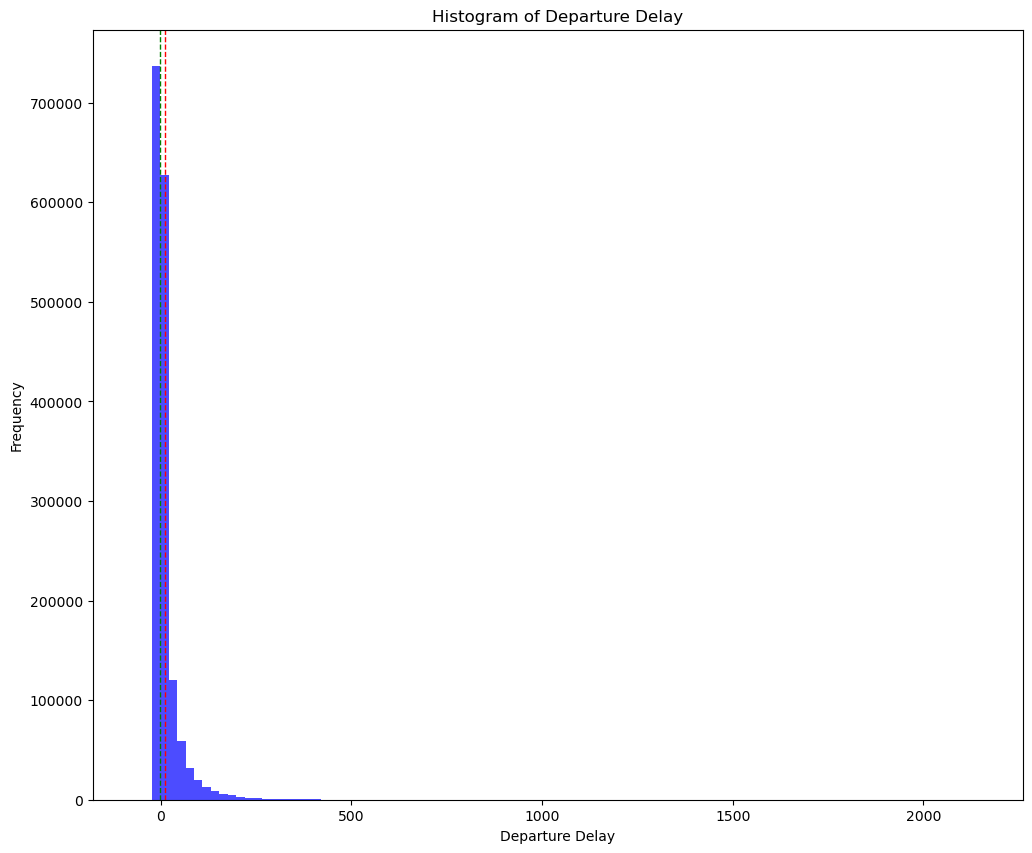

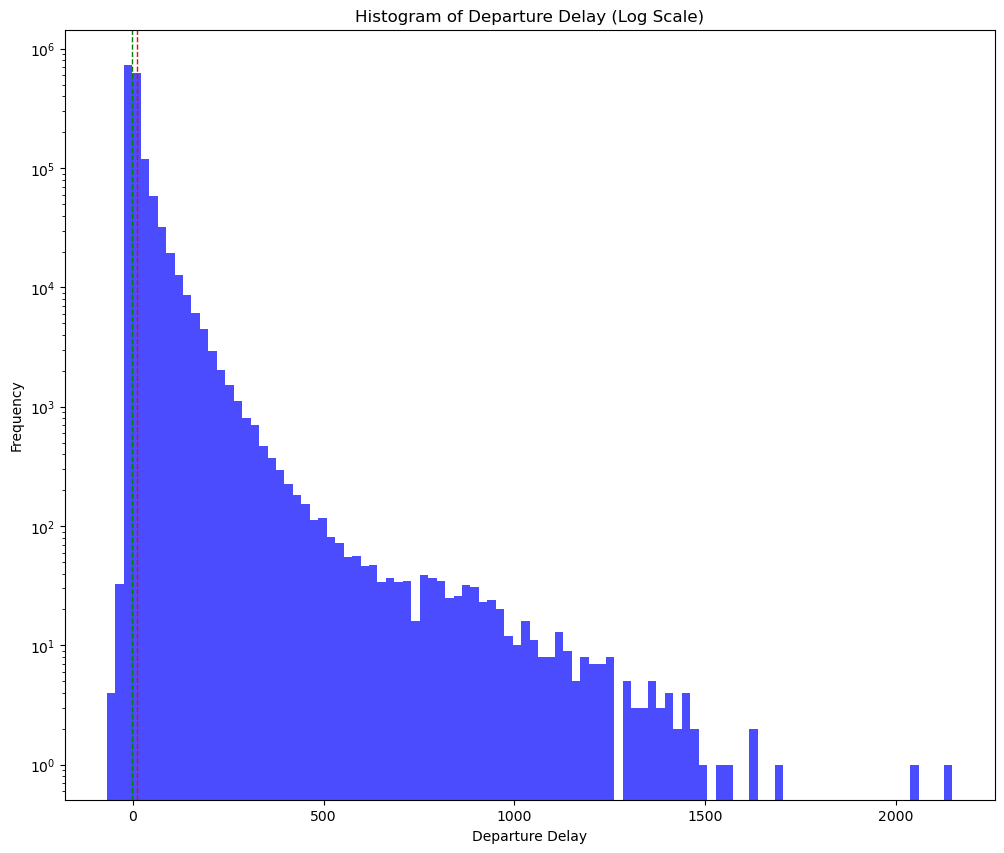

In [5]:
#histogram of departure delay frequency
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay.png')

#and the logged version
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay (Log Scale)')
plt.yscale('log')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay_log.png')

In [6]:
#summary statistics about the departure delay
print('Min:', df['DepDelay'].min())
print('Max:', df['DepDelay'].max())
print('Mean:', df['DepDelay'].mean())
print('Median:', df['DepDelay'].median())
print('Mode:', df['DepDelay'].mode())
print('Standard Deviation:', df['DepDelay'].std())
print('Skew:', df['DepDelay'].skew())

# Calculating the ratio of DepDelay < 15 to DepDelay > 15
negative_delays = df[df['DepDelay'] < 15].shape[0]
positive_delays = df[df['DepDelay'] > 15].shape[0]

ratio = negative_delays / positive_delays
print(f'Ratio of DepDelay < 15 to DepDelay > 15: {ratio:.2f}')

Min: -68.0
Max: 2149.0
Mean: 11.53406553993222
Median: -1.0
Mode: 0   -3.0
Name: DepDelay, dtype: float64
Standard Deviation: 40.341350425288944
Skew: 8.48420257120976
Ratio of DepDelay < 15 to DepDelay > 15: 4.00


In [7]:
# create a new target: delay_binary
# set to 0 if DepDelay is less than or equal to 15, and 1 DepDelay it is greater than 15
df_nums['delay_binary'] = np.where(df_nums['DepDelay'] <= 15, 0, 1)

In [8]:
# create a new target: delay_interval
#1 - 15 - 30 min
#2 - 30-60
#3 - 1hr-2hr
#4 - 2-5hr
#5 - Over 5hr
bins = [15, 30, 60, 120, 300, df_nums['DepDelay'].max()]
labels = [0, 1, 2, 3, 4]
df_nums['delay_interval'] = pd.cut(df_nums['DepDelay'], bins=bins, labels=labels)


bin_counts = df_nums['delay_interval'].value_counts().sort_index()
print("Counts per delay interval:")
print(bin_counts)

Counts per delay interval:
delay_interval
0    119619
1    100529
2     68756
3     32937
4      3889
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap with delay_binary')

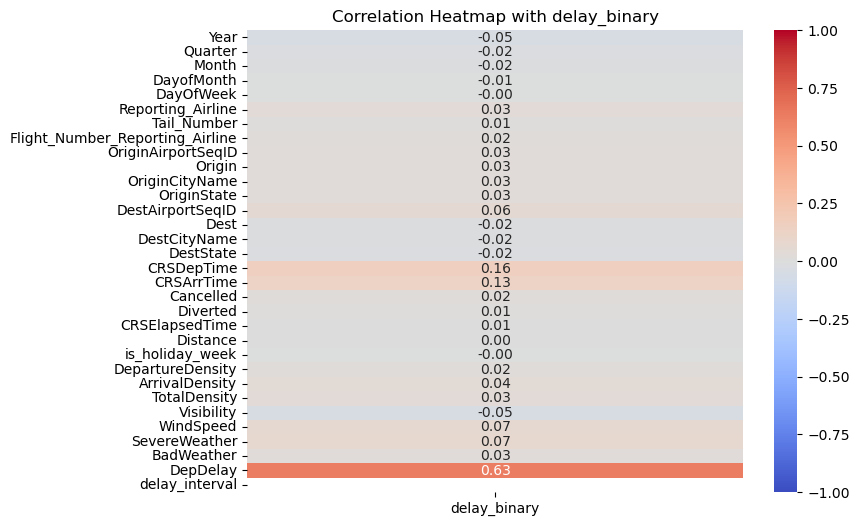

In [9]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_binary']].drop('delay_binary') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_binary')

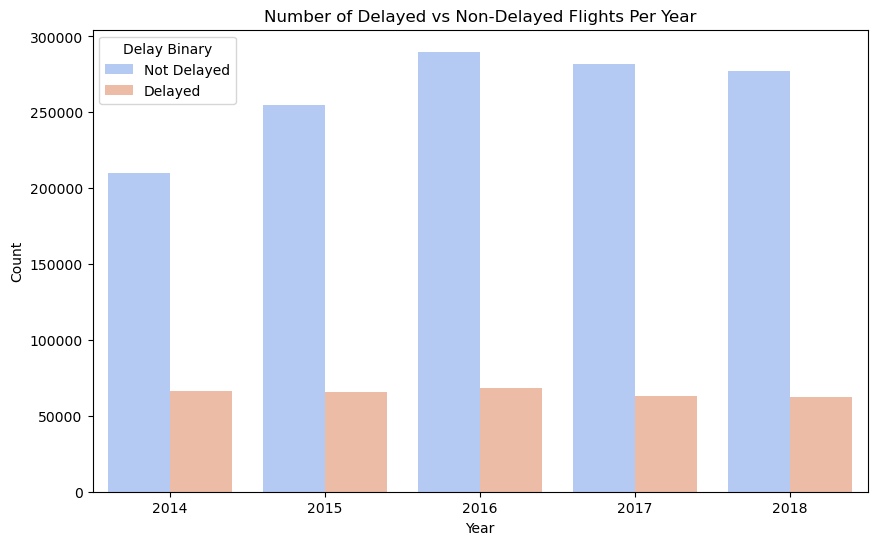

In [10]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='Year', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])

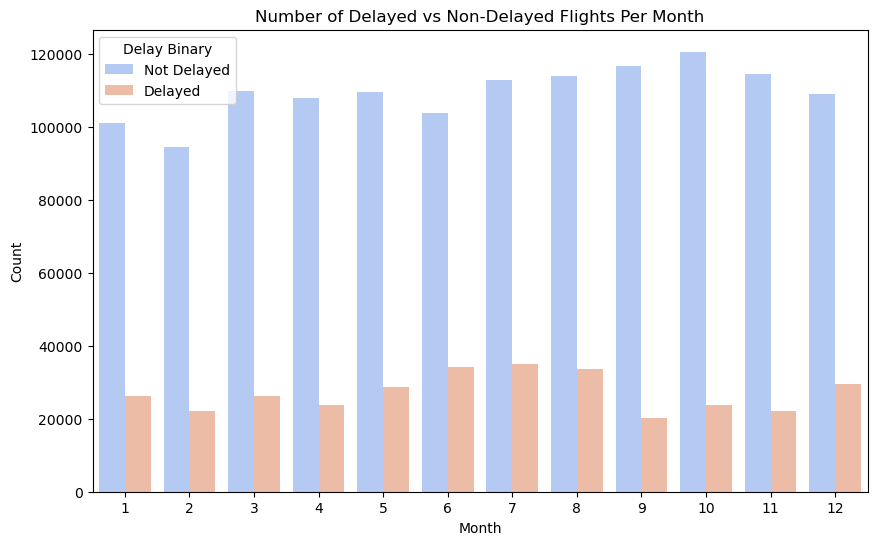

In [11]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='Month', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])

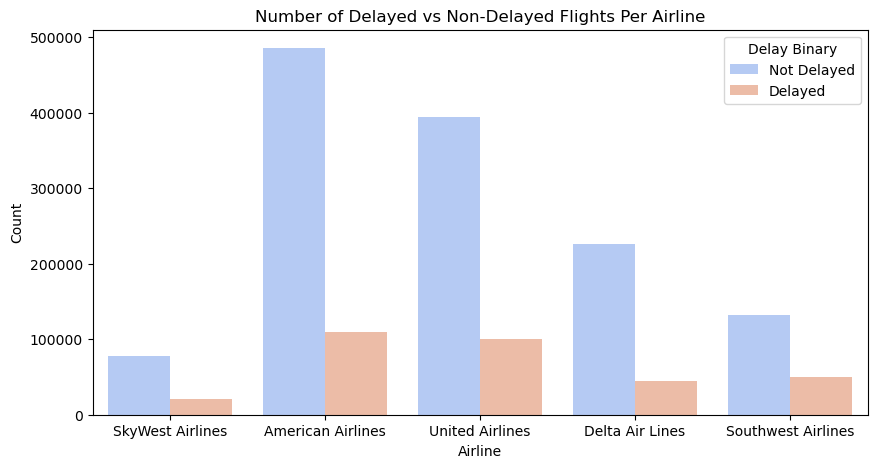

In [12]:
#make the same plot but show name of the airline
# Original: ['OO' 'AA' 'UA' 'DL' 'WN']
# Converted: ["SkyWest Airlines" "American Airlines" "United Airlines" "Delta Air Lines" "Southwest Airlines"]
airlines = df['Reporting_Airline'].unique()
airline_names = ['SkyWest Airlines', 'American Airlines', 'United Airlines', 'Delta Air Lines', 'Southwest Airlines']
airline_dict = dict(zip(airlines, airline_names))

df_nums['Reporting_Airline'] = df['Reporting_Airline'].map(airline_dict)

plt.figure(figsize=(10, 5))
sns.countplot(x='Reporting_Airline', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/airline_delay.png')

df_nums.drop(['Reporting_Airline'], axis=1, inplace=True)

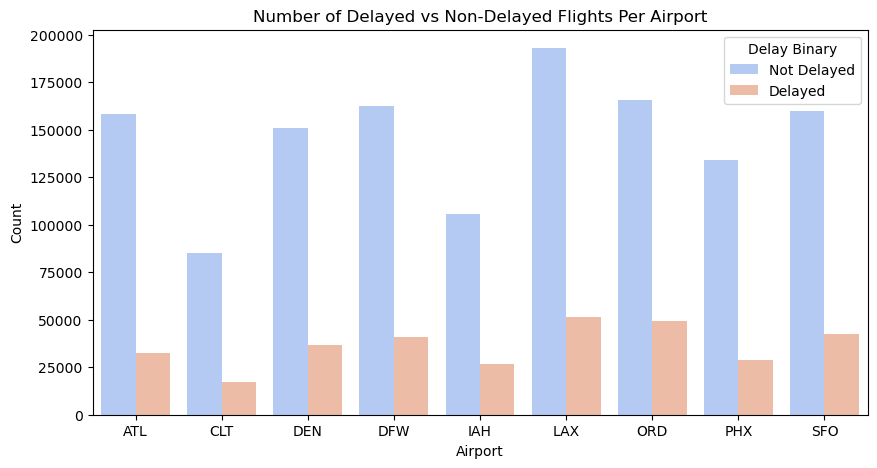

In [13]:
#delay flights by airport
# Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
#Converted: [0 1 2 3 4 5 6 7 8]
airports = df['Origin'].unique()
airport_names = ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']
airport_dict = dict(zip(airports, airport_names))

df_nums['Origin_name'] = df['Origin'].map(airport_dict)

plt.figure(figsize=(10, 5))
sns.countplot(x='Origin_name', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/airport_delay.png')

df_nums.drop(['Origin_name'], axis=1, inplace=True)

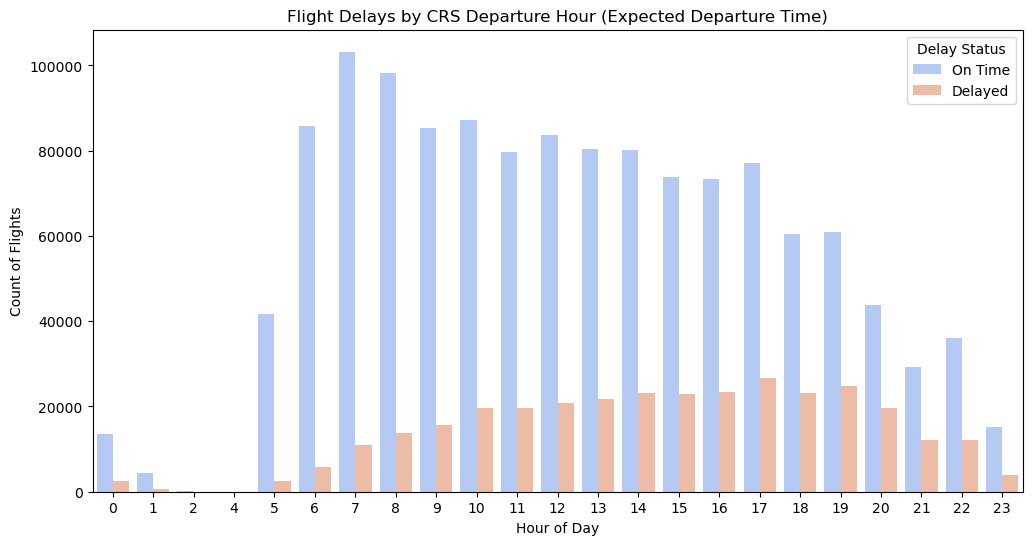

In [14]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Departure Hour (Expected Departure Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_departure.png')

In [15]:
# Assuming df_nums_copy is already set up with 'Hour' derived from 'CRSDepTime'
df_nums_copy['Hour Block'] = pd.cut(df_nums_copy['Hour'], 
                                    bins=[-1, 2, 5, 8, 11, 14, 17, 20, 23, 24], 
                                    labels=['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24'])

# Group by the new 'Hour Block' and 'delay_binary', and count occurrences
flight_counts = df_nums_copy.groupby(['Hour Block', 'delay_binary']).size().unstack(fill_value=0)
flight_counts['Delay Ratio'] = flight_counts[1] / (flight_counts[0] + flight_counts[1])

print("Ratio of Delayed Flights by Hour Block:")
print(flight_counts['Delay Ratio'])


Ratio of Delayed Flights by Hour Block:
Hour Block
0-2      0.148209
3-5      0.058261
6-8      0.096600
9-11     0.179366
12-14    0.211697
15-17    0.245244
18-20    0.290001
21-23    0.259275
24            NaN
Name: Delay Ratio, dtype: float64


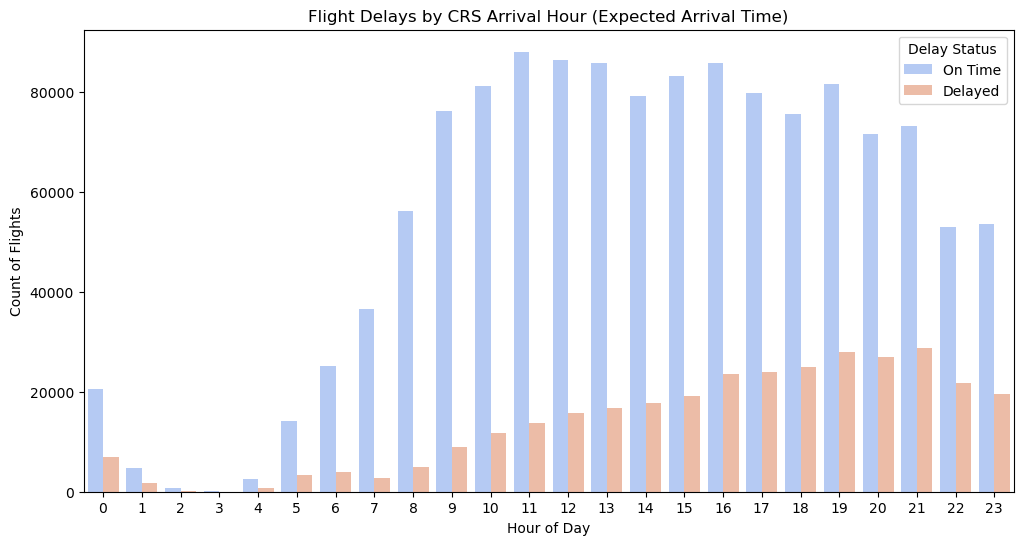

In [16]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Arrival Hour (Expected Arrival Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_arrival.png')

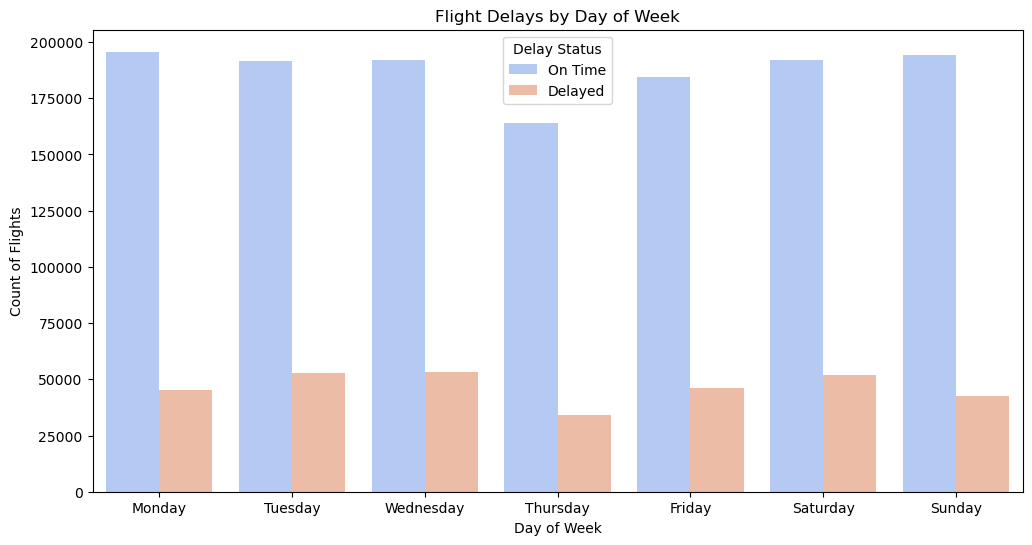

In [17]:
#make the same plot but for day of week
#make it the actual name of the day
# Original: [1 2 3 4 5 6 7]
# Converted: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
days = df['DayOfWeek'].unique()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dict = dict(zip(days, day_names))

df_nums_copy = df_nums.copy()
df_nums_copy['DayOfWeek'] = df_nums_copy['DayOfWeek'].map(day_dict)


plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/delay_by_day_of_week.png')

Text(0, 0.5, 'Departure Density')

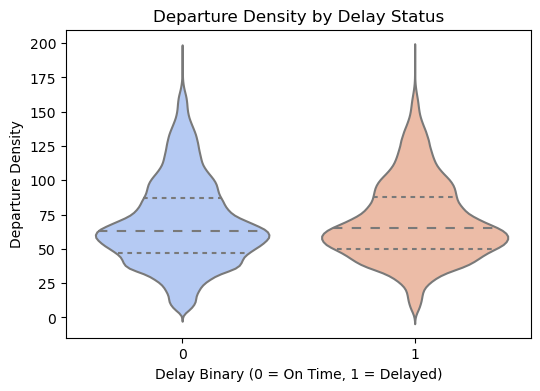

In [18]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='DepartureDensity', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('Departure Density by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('Departure Density')

Text(0, 0.5, 'Arrival Density')

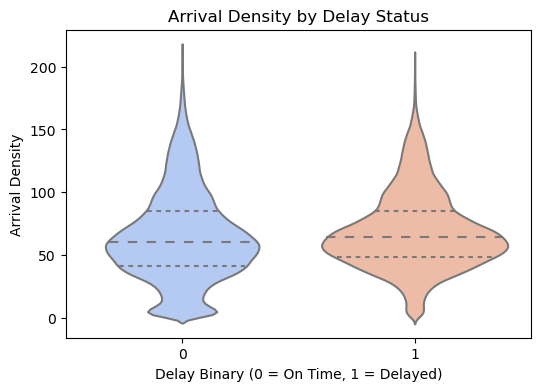

In [19]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='ArrivalDensity', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('Arrival Density by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('Arrival Density')

Text(0, 0.5, 'WindSpeed')

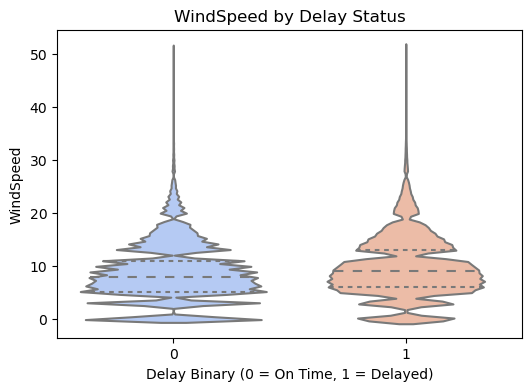

In [20]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='WindSpeed', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('WindSpeed by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('WindSpeed')

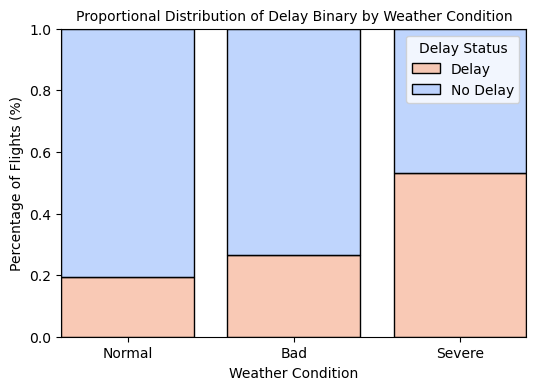

In [21]:
plot_df = df_nums.copy()

plot_df['WeatherCondition'] = 'Normal'
plot_df.loc[plot_df['BadWeather'] == 1, 'WeatherCondition'] = 'Bad'
plot_df.loc[plot_df['SevereWeather'] == 1, 'WeatherCondition'] = 'Severe'

plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=plot_df,
    x='WeatherCondition', 
    hue='delay_binary',   
    multiple="fill",
    discrete=True,
    shrink=0.8,
    common_norm=False,     
    palette='coolwarm'
)

plt.title('Proportional Distribution of Delay Binary by Weather Condition', fontsize=10)
plt.xlabel('Weather Condition', fontsize=10)
plt.ylabel('Percentage of Flights (%)', fontsize=10)

plt.legend(title='Delay Status', labels=['Delay', 'No Delay'], title_fontsize='10', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap with delay_interval')

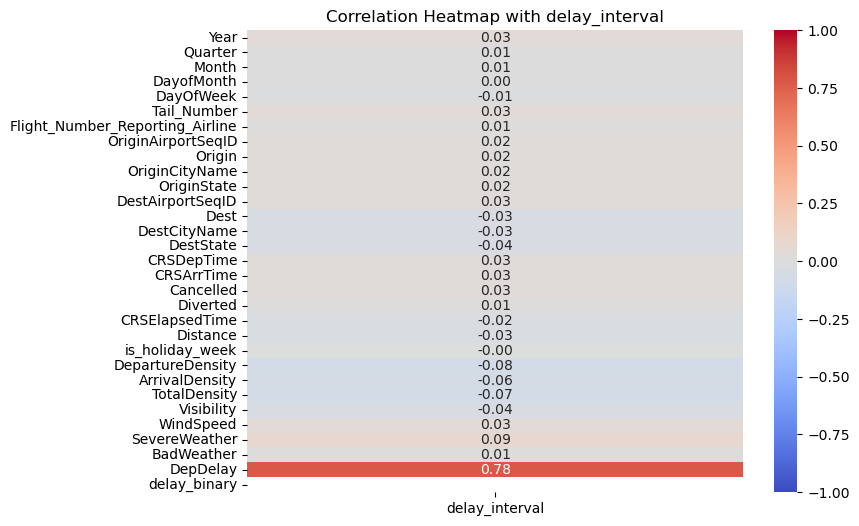

In [22]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_interval']].drop('delay_interval') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_interval')

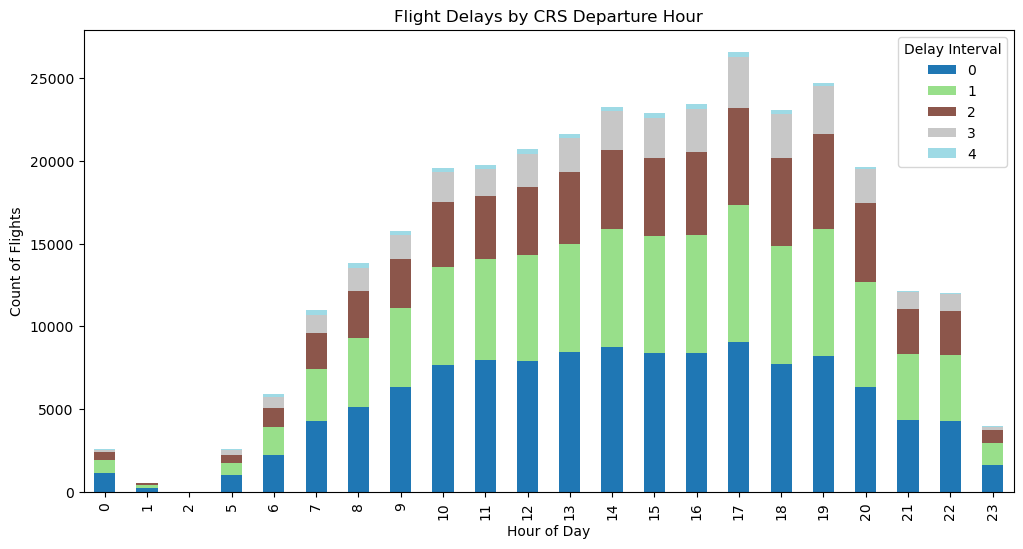

In [23]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

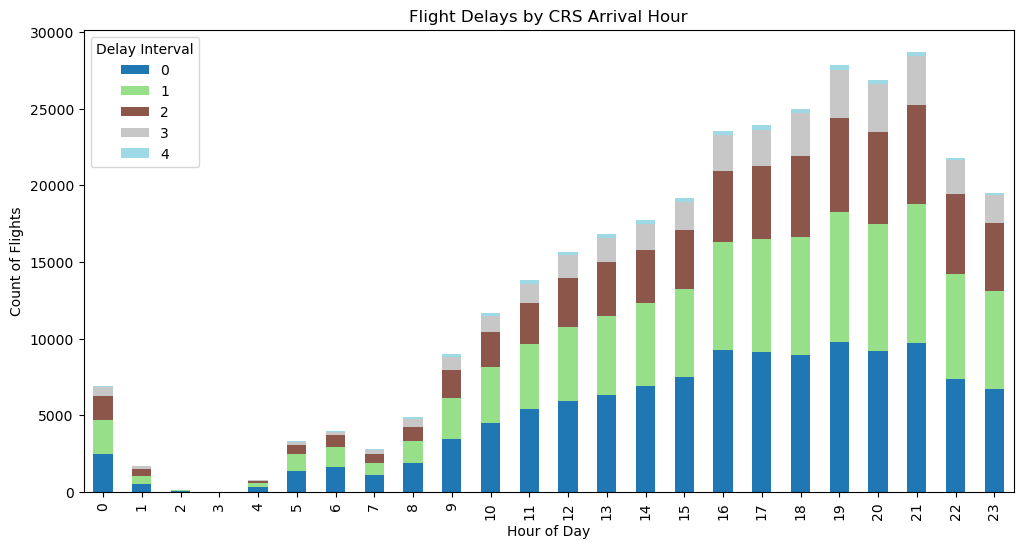

In [24]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Arrival Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

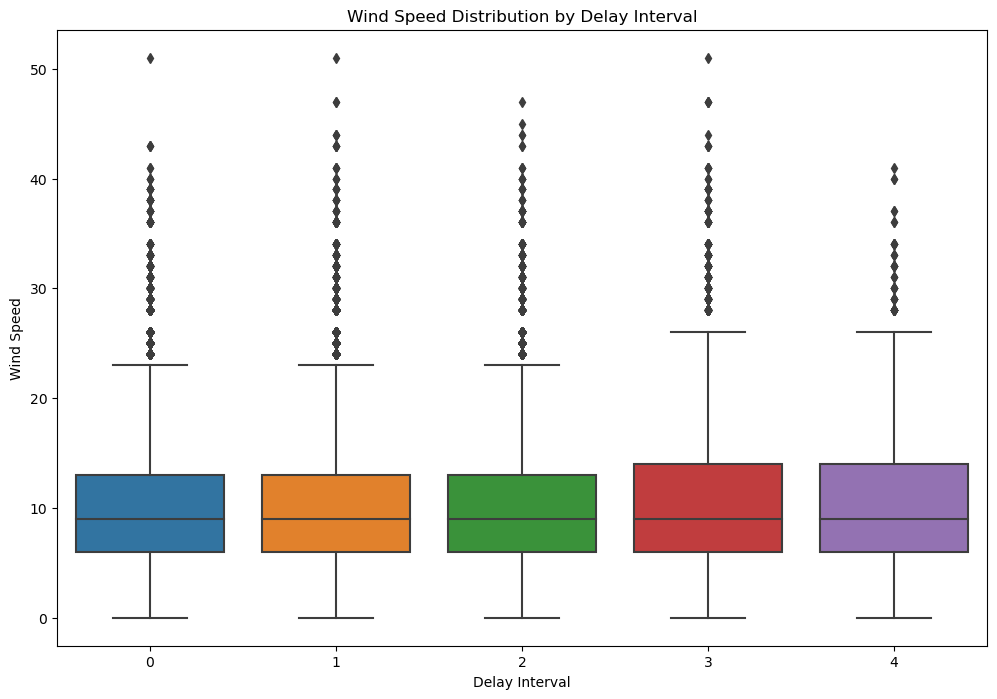

In [25]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='delay_interval', y='WindSpeed', data=df_nums)
plt.title('Wind Speed Distribution by Delay Interval')
plt.xlabel('Delay Interval')
plt.ylabel('Wind Speed')
plt.show()

Text(0, 0.5, 'Percentage of Flights (%)')

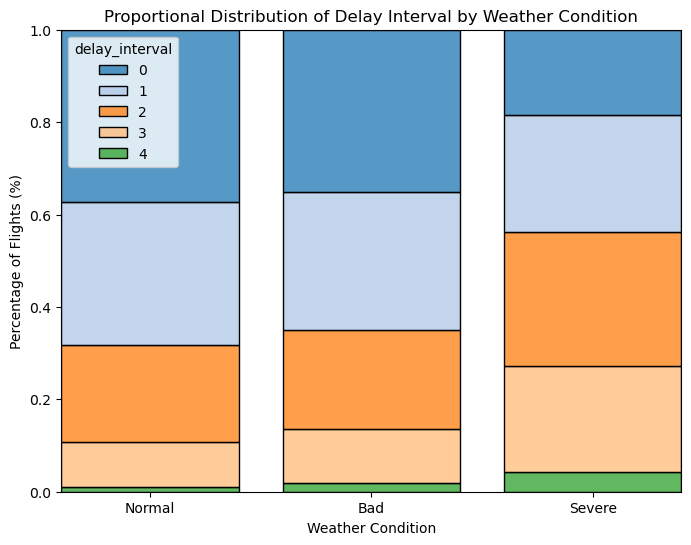

In [26]:
plot_df = df_nums.copy()

plot_df['WeatherCondition'] = 'Normal'
plot_df.loc[plot_df['BadWeather'] == 1, 'WeatherCondition'] = 'Bad'
plot_df.loc[plot_df['SevereWeather'] == 1, 'WeatherCondition'] = 'Severe'

plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=plot_df,
    x='WeatherCondition', 
    hue='delay_interval',   
    multiple="fill",
    discrete=True,
    shrink=0.8,
    common_norm=False,     
    palette='tab20'
)

plt.title('Proportional Distribution of Delay Interval by Weather Condition', fontsize=12)
plt.xlabel('Weather Condition', fontsize=10)
plt.ylabel('Percentage of Flights (%)', fontsize=10)

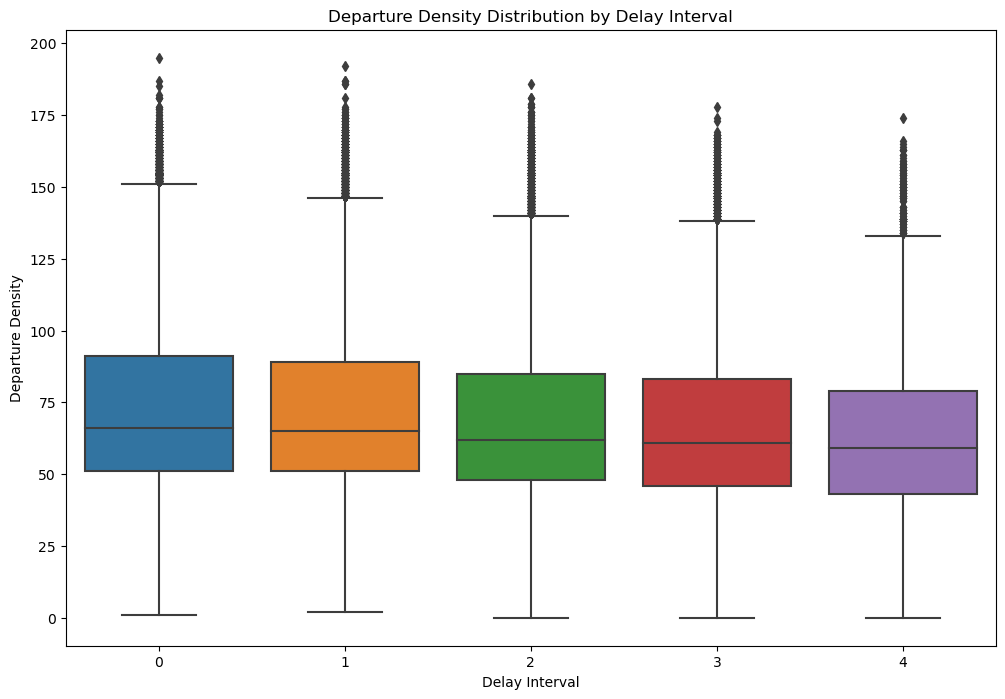

In [27]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='delay_interval', y='DepartureDensity', data=df_nums)
plt.title('Departure Density Distribution by Delay Interval')
plt.xlabel('Delay Interval')
plt.ylabel('Departure Density')
plt.show()

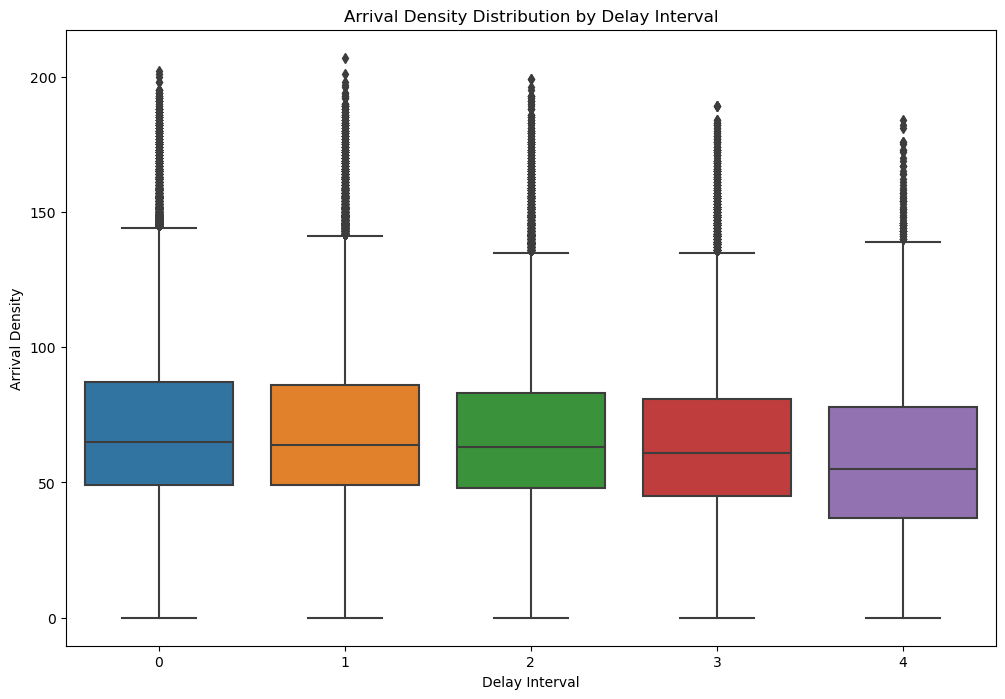

In [28]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='delay_interval', y='ArrivalDensity', data=df_nums)
plt.title('Arrival Density Distribution by Delay Interval')
plt.xlabel('Delay Interval')
plt.ylabel('Arrival Density')
plt.show()

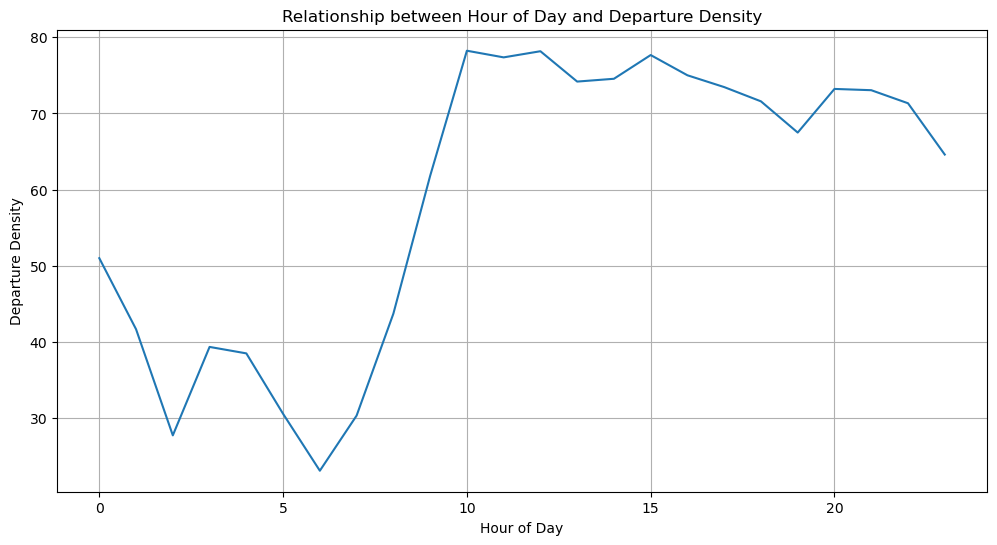

In [29]:
hourly_departure_density = df_nums_copy.groupby('Hour')['DepartureDensity'].mean()

hourly_departure_density.plot(kind='line', figsize=(12, 6))
plt.title('Relationship between Hour of Day and Departure Density')
plt.xlabel('Hour of Day')
plt.ylabel('Departure Density')
plt.grid(True)

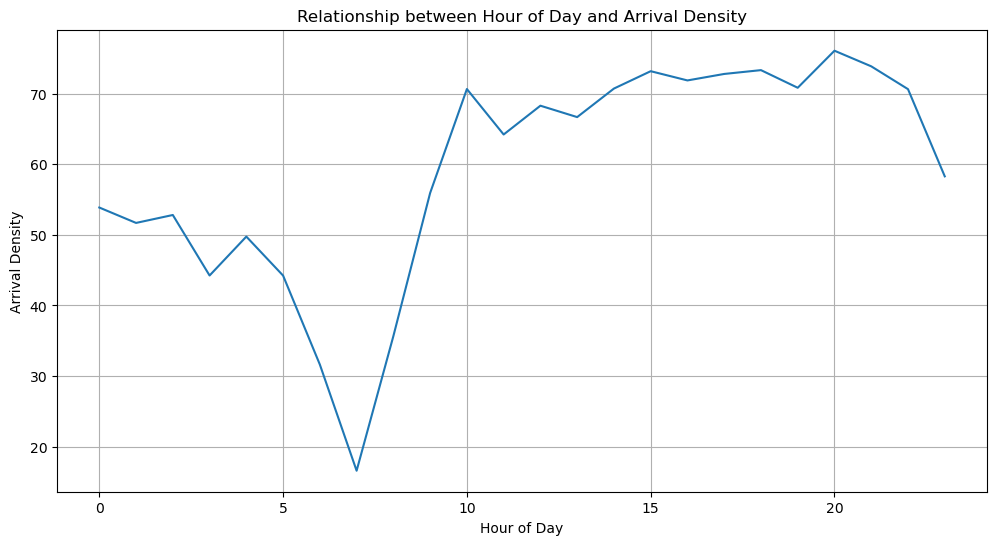

In [30]:
hourly_arrival_density = df_nums_copy.groupby('Hour')['ArrivalDensity'].mean()

hourly_arrival_density.plot(kind='line', figsize=(12, 6))
plt.title('Relationship between Hour of Day and Arrival Density')
plt.xlabel('Hour of Day')
plt.ylabel('Arrival Density')
plt.grid(True)

In [31]:
df_nums.to_csv('csv_flight/df_nums.csv', index=False)  

Explained Variance:  [1.68850616e-01 1.08950269e-01 7.77108751e-02 7.07742997e-02
 6.92314748e-02 5.19358353e-02 4.72071600e-02 4.04487802e-02
 3.53743046e-02 3.48305251e-02 3.45564704e-02 3.42906001e-02
 3.38115177e-02 3.29463124e-02 3.23016397e-02 3.03271698e-02
 2.95260884e-02 2.31034821e-02 1.71643513e-02 1.33493254e-02
 5.42688170e-03 5.27371991e-03 1.00698869e-03 7.30188499e-04
 5.23152839e-04 3.47970109e-04 3.67926585e-32 2.23545947e-33
 2.47848145e-34]


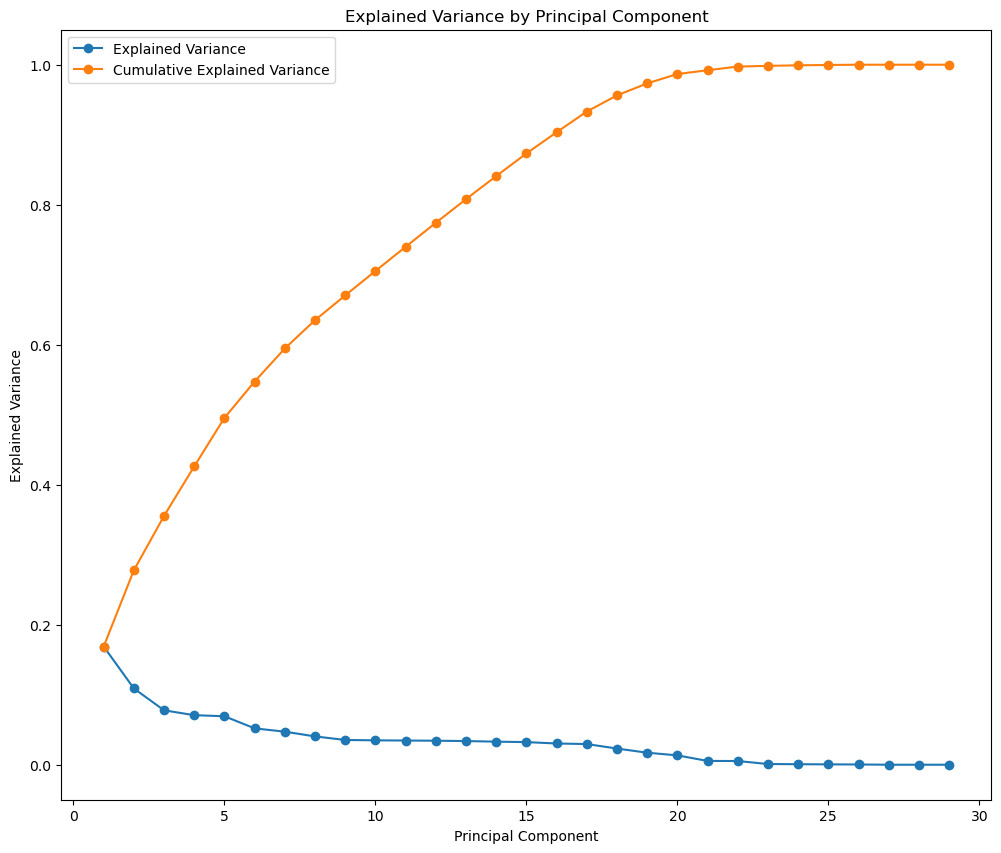

In [32]:
#PCA
df_nums.drop(['DepDelay', 'delay_binary', 'delay_interval'], axis=1, inplace=True)

#standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nums)

#find the principal components
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

#plot the explained variance and cumulative explained variance
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.legend()